# Housing

In [2]:
import sys
sys.path.append('../src')

import uschartbook.config

from uschartbook.config import *
from uschartbook.utils import *

### Homeownership rate

In [3]:
data = fred_df('RHORUSQ156N')['VALUE']

data.to_csv(data_dir / 'homeown.csv', index_label='date', header=True)

datelt = dtxt(data.index[-1])['qtr1']
latest = data.iloc[-1]
ch3yr = data.diff(12).iloc[-1]

txt = val_inc_pp(ch3yr)

text = (f'As of {datelt}, the Census Bureau '+
        '\href{https://www.census.gov/housing/hvs/index.html}{reports} a rate '+
        f'of home-ownership of {latest:.1f} percent (see {{\color{{violet!60!magenta}}\\textbf{{---}}}}). '+
        f'Over the past three years, the overall US homeownership rate {txt}.')

write_txt(text_dir / 'homeown.txt', text)

print(text)

node = end_node(data, 'violet!60!magenta')
write_txt(text_dir / 'homeown_node.txt', node)

As of 2019 Q4, the Census Bureau \href{https://www.census.gov/housing/hvs/index.html}{reports} a rate of home-ownership of 65.1 percent (see {\color{violet!60!magenta}\textbf{---}}). Over the past three years, the overall US homeownership rate increased by a total of 1.4 percentage points.


### By Race/Ethnicity

In [4]:
url = 'https://www.census.gov/housing/hvs/data/histtab16.xlsx'

data = pd.read_excel(url)
df = data.iloc[7:-8, :-1].reset_index().drop('index', axis=1)
df.columns = ['Date', 'Total', 'White', 'Black', 'Other', 'Other2', 'Hispanic']
df = df.replace('2002r', 2002).replace('20033', 2003)

q = {1: '01', 2: '04', 3: '07', 4: '10'}

d = {}
for i, row in df.iterrows():
    if i not in d.keys():
        d[i] = {}
    if type(row['Date']) == int:
        for y in list(range(i, i+5)):
            d[y] = {'quarter': ''}
            d[y]['year'] = row['Date']
    if (type(row['Date']) != int) & ('.' in str(row['Date'])):
        d[i]['quarter'] = q[int(row['Date'][0])]
        
    if 'year' not in d[i].keys():
        d[i] = {'date': '', 'year': '', 'quarter': ''}
    else:
        d[i]['date'] = f'{d[i]["year"]}-{d[i]["quarter"]}-01'
        
dates = {k: v['date'] for k, v in d.items()}
df['date'] = df.index.map(dates)
df = df.dropna()
df = df.set_index(pd.to_datetime(df.date))
result = df[['White', 'Black', 'Hispanic', 'Other', 'Total']]

result.to_csv(data_dir / 'homeown2.csv', index_label='date', header=True)

write_txt(text_dir / 'homeown_black_node.txt', end_node(result['Black'], 'red!20!orange!95!black'))
write_txt(text_dir / 'homeown_white_node.txt', end_node(result['White'], 'blue!80!cyan!80!black'))
write_txt(text_dir / 'homeown_hispanic_node.txt', end_node(result['Hispanic'], 'green!80!blue!85!black'))
write_txt(text_dir / 'homeown_other_node.txt', end_node(result['Other'], 'red!80!black'))

wtlt = result.White.iloc[-1]
blmax = result['Black'].max()
blidxmax = dtxt(result['Black'].idxmax())['qtr2']
blmin = result.loc['2006':, 'Black'].min()
blidxmin = dtxt(result.loc['2006':, 'Black'].idxmin())['qtr1']
bllt = result.Black.iloc[-1]
ltdt = dtxt(result.index[-1])['qtr1']
hsmax = result['Hispanic'].max()
hsidxmax = dtxt(result['Hispanic'].idxmax())['qtr2']
hslt = result['Hispanic'].iloc[-1]
compare = compare_text(hslt, hsmax, [0.3, 1.0, 3.0])

text = (f'Around three-quarters ({wtlt:.1f} percent in {ltdt}) of non-Hispanic '+
        'white households own their home (see {\color{blue!80!cyan!80!black}\\textbf{---}}), '+
        'compared to fewer than half of black and Hispanic households. ')

write_txt(text_dir / 'homeown2.txt', text)

print(text, '\n')

txt2 = ('During the housing bubble, the homeownership rate for black households increased '+
        f'by nearly ten percentage points, peaked at {blmax:.1f} percent '+
        f'in {blidxmax}, and fell to {blmin:.1f} percent in {blidxmin}. The current '+
        f'homeownership rate for black households is {bllt:.1f} percent, as of '+
        f'{ltdt} (see {{\color{{red!20!orange!95!black}}\\textbf{{---}}}}). '+
        'The homeownership rate for Hispanic households '+
        f'of any race is {hslt:.1f} percent in {ltdt}, {compare} the '+
        f'{hsmax:.1f} percent peak rate in {hsidxmax} '+
        '(see {\color{green!80!blue!85!black}\\textbf{---}}). ')

write_txt(text_dir / 'homeown3.txt', txt2)

print(txt2)

Around three-quarters (73.7 percent in 2019 Q4) of non-Hispanic white households own their home (see {\color{blue!80!cyan!80!black}\textbf{---}}), compared to fewer than half of black and Hispanic households.  

During the housing bubble, the homeownership rate for black households increased by nearly ten percentage points, peaked at 49.7 percent in the second quarter of 2004, and fell to 40.6 percent in 2019 Q2. The current homeownership rate for black households is 44.0 percent, as of 2019 Q4 (see {\color{red!20!orange!95!black}\textbf{---}}). The homeownership rate for Hispanic households of any race is 48.1 percent in 2019 Q4, substantially below the 50.1 percent peak rate in the first quarter of 2007 (see {\color{green!80!blue!85!black}\textbf{---}}). 


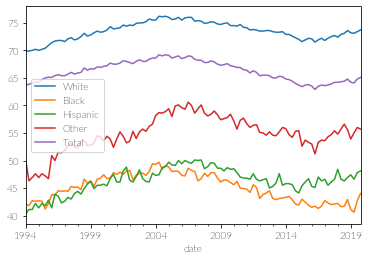

In [5]:
result.plot()

### FHFA Housing Price Index

In [106]:
df = pd.read_csv('https://www.fhfa.gov/HPI_master.csv')

data = df.query('frequency == "monthly" and place_name == "United States"')[['yr', 'period', 'index_sa']]

data.index = [pd.to_datetime(f'{i.yr:.0f}-{i.period:.0f}-01') for idx, i in data.iterrows()]

ch = (data['index_sa'].pct_change(12) * 100)

ch.to_csv(data_dir / 'hpi.csv', index_label='date', header='True')

node = end_node(ch, 'cyan!60!blue')
write_txt(text_dir / 'fhfa_node.txt', node)
chtxt = (f'increased by {ch.iloc[-1]:.1f} percent' if ch.iloc[-1] > 0.1 
         else f'decreased by {abs(ch.iloc[-1]):.1f} percent' if ch.iloc[-1] < -0.1
         else 'was virtually unchanged')
ltdate = ch.index[-1]
ltdt = dtxt(ltdate)['mon1']
text1 = chtxt + f' over the year ending {ltdt}. '

In [107]:
d1 = df.query('frequency == "monthly" and place_name != "United States"')

result = pd.DataFrame()
result['latest'] = (d1.query('yr == @ltdate.year and period == @ltdate.month')
                      .set_index('place_name').index_sa)

prvyr = ltdate.year - 1

result['year_ago'] = (d1.query('yr == @prvyr and period == @ltdate.month')
                      .set_index('place_name').index_sa)

result['growth'] = ((result.latest / result.year_ago) - 1) * 100

div = result.growth.idxmax().replace(' Division', '')

divs = pd.read_csv('raw/census_regions.csv')
div_list = divs[divs['Division'] == div].State.to_list()
d0 = 'which includes '
d1 = ', '.join(div_list[:-1])
d2 = f', and {div_list[-1]}.'

txt = d0 + d1 + d2

text2 = ('Among Census Divisions, the fastest one-year housing price index growth '+
         f'rate in {ltdt} was {result.growth.max():.1f} percent in the {div} Division, {txt}')

text = text1 + text2

write_txt(text_dir / 'fhfa.txt', text)

### Owner's equity share in real estate

In [47]:
data = fred_df('HOEREPHRE')['VALUE'].astype('float')

data.to_csv(data_dir / 'homeeq.csv', index_label='date', header=True)

datelt = dtxt(data.index[-1])['qtr1']
latest = data.iloc[-1]
ch3yr = data.diff(12).iloc[-1]
ch1yr = data.diff(4).iloc[-1]
txt = val_inc_pp(ch3yr)
txt2 = val_inc_pp(ch1yr)
avg89 = data.loc['1989'].mean()
compare = compare_text(latest, avg89, [0.05, 1.0, 5.0])

fedlink = 'https://www.federalreserve.gov/releases/z1/20191212/html/b101.htm'

text = (f'As of {datelt}, the Federal Reserve \href{{fedlink}}{{reports}} '+
        f"owners\' equity is {latest:.1f} percent of residential "+
        'real estate (see {\color{blue!80!violet}\\textbf{---}}). '+
        f"Over the past three years, the owners\' equity share {txt}. "+
        f'Over the past year, the share {txt2}. The current share is {compare} '+
        f'the 1989 average of {avg89:.1f} percent.')

write_txt(text_dir / 'homeeq.txt', text)

print(text)

node = end_node(data, 'blue!80!violet')
write_txt(text_dir / 'homeeq_node.txt', node)

As of 2019 Q4, the Federal Reserve \href{fedlink}{reports} owners' equity is 63.8 percent of residential real estate (see {\color{blue!80!violet}\textbf{---}}). Over the past three years, the owners' equity share increased by a total of 2.9 percentage points. Over the past year, the share increased by a total of 0.2 percentage points. The current share is substantially below the 1989 average of 67.9 percent.


### Geographic Detail for Housing Wealth Data

In [5]:
url = 'https://www.federalreserve.gov/releases/efa/state-census-region-housing-wealth.csv'

regions = ['Northeast', 'Midwest', 'West', 'South', 'US']

data = pd.read_csv(url, index_col=0)
data.index = pd.to_datetime([f'{i[:4]}-{int(i[-1]) * 3 - 2}-01' for i in data.index])
data = data.rename({'National': 'US'}, axis=1)[regions]

series = {'EOWNOCCNEQ176N': 'Northeast_Q', 
          'EOWNOCCMWQ176N': 'Midwest_Q', 
          'EOWNOCCSOQ176N': 'South_Q', 
          'EOWNOCCWEQ176N': 'West_Q', 
          'EOWNOCCUSQ176N': 'US_Q'}

df = pd.DataFrame()
for srs, name in series.items():
    url = f'http://research.stlouisfed.org/fred2/series/{srs}/downloaddata/{srs}.csv'
    s = pd.read_csv(url, index_col='DATE', parse_dates=True)['VALUE']
    df[name] = s
    
results = pd.DataFrame()
for region in regions:
    regionq = f'{region}_Q'
    regionp = f'{region}_P'
    
    total_value = data[region]
    
    quantity = df[regionq]
    
    unit_price = total_value / quantity
    
    growth = total_value.pct_change(4) * 100
    
    price_growth = unit_price.pct_change(4) * 100
    
    quantity_growth = growth - price_growth
    
    results[regionq] = quantity_growth 
    results[regionp] = price_growth 

results = results.dropna()

results.to_csv(data_dir / 'val_ooh.csv', index_label='date', float_format='%g')

### Residential construction

In [6]:
key = census_key
base = 'https://api.census.gov/data/timeseries/eits/resconst/'
param = 'cell_value,time_slot_id,category_code'
t = '&time=from+1989'
dtc = '&data_type_code=TOTAL'
oth = '&for=us&seasonally_adj=yes'

url = f'{base}?get={param}&key={key}{dtc}{t}{oth}'

r = requests.get(url).json()

df = pd.DataFrame()
for series in ['APERMITS', 'ASTARTS']:
    df[series] = pd.Series(
        {pd.to_datetime(i[4]): 
         float(i[0]) for i in r[1:] if i[2] == series}
    ).sort_index()

In [7]:
df.to_csv(data_dir / 'permits.csv', index_label='date')

s = series_info(df['APERMITS'])
s['val_5yr_ago'] = df['APERMITS'].iloc[-61]

if s['days_since_match'] > 100:
    hlt = f", {s['last_matched']}"
else:
    hlt = ''
    
month = s['date_latest'].strftime('%B')

d = {}
for i in ['val_prev', 'val_year_ago', 'val_5yr_ago']:
    mo_ch = s["val_latest"] - s[i]
    mo_pch = (s["val_latest"] / s[i] - 1) * 100
    if mo_ch >= 0.1:
        txt = f'increased by {abs(mo_ch)*1000:,.0f} ({mo_pch:.1f} percent)'
    elif mo_ch <= -0.1:
        txt = f'decreased by {abs(mo_ch)*1000:,.0f} ({mo_pch:.1f} percent)'
    else:
        txt = 'were virtually unchanged'
        
    d[i] = txt
    
text = (f'In {s["date_latest_ft"]}, a seasonally-adjusted annual rate of '+
        f'{s["val_latest"]*1000:,.0f} new '+
        f'residential housing units were authorized by building permits{hlt}. '+
        f'Permits issued {d["val_prev"]} over the previous month, '+
        f'{d["val_year_ago"]} over last {month}, and '+
        f'{d["val_5yr_ago"]} total over the past five years.')

write_txt(text_dir / 'permits.txt', text)

text

'In February 2020, a seasonally-adjusted annual total of 1,452,000 new residential building permits were issued. Permits issued decreased by 98,000 (-6.3 percent over the previous month, increased by 165,000 (12.8 percent) over last February, and increased by 321,000 (28.4 percent) total over the past five years.'

### Household formation estimates

In [2]:
files = ['histtab8.xlsx', 'hist_tab_8a_v2018.xlsx']
url = 'https://www.census.gov/housing/hvs/data/'

results = {}

for file in files:
    data = pd.read_excel(url + file).iloc[4:, :5]
    data.columns = ['category', 'Q1', 'Q2', 'Q3', 'Q4']
    years = []
    for h in data[data['Q1'] == '1st Qtr'].index - 1:
        year_raw = data.loc[h, 'Q1']
        if type(year_raw) == int:
            year = year_raw
        elif type(year_raw) == str:
            year = int(year_raw[:4])
        elif type(year) == float:
            year = year + 1
        years.append(year)
    data.loc[data['Q1'] == '1st Qtr', 'category'] = years
    data = data.dropna(subset=['category'])
    
    df = pd.DataFrame()
    levels = pd.DataFrame()
    for series in ['Owner', 'Renter']:
        srs = data.loc[data['category'].astype('str').str.contains(series)]
        srs.index = years
        srs = srs[['Q1', 'Q2', 'Q3', 'Q4']].unstack().swaplevel()
        srs.index = pd.to_datetime([f'{i[0]}-{i[1]}' for i in srs.index])
        srs = srs.sort_index()
        df[series] = srs
        levels[series] = srs
    df = df.dropna()
    df['Total'] = df.sum(axis=1)
    
    # Convert to share of total change
    for s in ['Owner', 'Renter']:  
        df[s] = ((df[s] - df[s].shift(4))
                  /df['Total'].shift(4)) * 100
        
    df = (df.reset_index()
            .drop_duplicates(subset='index', keep='last')
            .set_index('index'))
    
    results[file] = df[['Owner', 'Renter']].dropna().rolling(4).mean().loc['1989':]

In [3]:
final = results['histtab8.xlsx'].loc[:'2001'].append(results['hist_tab_8a_v2018.xlsx'].loc['2002':])
final['pop'] = (nipa_df(retrieve_table('T70100')['Data'], ['B230RC'])
                .pct_change(4).dropna() * 100)

final.to_csv(data_dir / 'hhform.csv', index_label='date')

levels = levels.dropna()
ldate = f'{levels.index[-1].year} Q{levels.index[-1].quarter}'
pdate = f'{levels.index[-2].year} Q{levels.index[-2].quarter}'
tot = levels.iloc[-1].sum() / 1000
rtot = levels['Renter'].iloc[-1] / 1000
rsh = rtot / tot * 100
otot = levels['Owner'].iloc[-1] / 1000
osh = otot / tot * 100

ch = levels.diff(4).rolling(4).mean().iloc[-1]
incdec = ['increase' if ch.sum() >= 0 else 'decrease']
chtot = [f'{abs(ch.sum()) / 1000:.1f} million' if ch.sum() > 1000 else f'{abs(ch.sum()):.0f} thousand'][0]

t = {name: [f'{abs(s) / 1000:.1f} million {["net new" if s >= 0 else "net fewer"][0]}' 
            if s > 1000 
            else f'{abs(s):.0f} thousand {["net new" if s >= 0 else "net fewer"][0]}'][0]
     for name, s in [('tot', ch.sum()), ('rent', ch.Renter), ('own', ch.Owner)]}

text = (f'As of {ldate}, there are {tot:.1f} million total occupied '+
        f'housing units in the US, of which {rtot:.1f} million ({rsh:.1f} percent) '+
        f'are rented, and {otot:.1f} million ({osh:.1f} percent) are '+
        'owner-occupied. There was an average annual net total '+
        f'{incdec[0]} of {chtot} housing units '+
        f'over the year ending {ldate}, the result of {t["rent"]} '+
        f'renter households and {t["own"]} '+
        f'owner-occupied households. ') 

In [4]:
totgr = final[['Owner', 'Renter']].sum(axis=1).iloc[-1]
ogr = final['Owner'].iloc[-1]
rgr = final['Renter'].iloc[-1]

final['Total'] = final[['Owner', 'Renter']].sum(axis=1)

t2 = {name: [f"{['increased' if s >= 0 else 'decreased'][0]} by {abs(s):.1f} percent"][0] 
      for name, s in final.iloc[-1].iteritems()}

t3 = {name: [f"{['an increase' if s >= 0 else 'a decreased'][0]} of {abs(s):.1f} percent"][0] 
      for name, s in final.iloc[-2].iteritems()}

t4 = {name: [f"{['a contribution' if s >= 0 else 'a reduction'][0]} of {abs(s):.1f} percent"][0] 
      for name, s in final.iloc[-2].iteritems()}

t5 = {name: [f"{[f'contributed {abs(s):.1f} percent to' if s >= 0 else f'subtracted {abs(s):.1f} percent from'][0]}"][0] 
      for name, s in final.iloc[-1].iteritems()}

text2 = (f'Over the year ending {ldate}, the total number of occupied housing units '+
         f'{t2["Total"]}, compared to {t3["Total"]} in {pdate}. Owner-occupied '+
         f'units {t5["Owner"]} total household formation on average over the year '+
         '(see\cbox{yellow!60!orange}), compared to '+
         f'{t4["Renter"]} from rented units (see\cbox{{magenta!90!blue}}).')

txt = text + text2

write_txt(text_dir / 'hhform1.txt', txt)

txt

'As of 2019 Q4, there are 124.0 million total occupied housing units in the US, of which 43.3 million (34.9 percent) are rented, and 80.7 million (65.1 percent) are owner-occupied. There was an average annual net total increase of 1.4 million housing units over the year ending 2019 Q4, the result of 298 thousand net new renter households and 1.1 million net new owner-occupied households. Over the year ending 2019 Q4, the total number of occupied housing units increased by 1.1 percent, compared to an increase of 1.2 percent in 2019 Q3. Owner-occupied units contributed 0.9 percent to total household formation on average over the year (see\\cbox{yellow!60!orange}), compared to a contribution of 0.2 percent from rented units (see\\cbox{magenta!90!blue}).'